**Описание данных**

Имеются следующие поля:

* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

Загрузим данные и убедимся, что всё считалось правильно: посмотрим на столбцы, типы данных, размерность, наличие пропущенных значений.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
games = pd.read_csv('/Users/pavel/Desktop/karpov/7 СТАТИСТИКА/1 games.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
games.dropna(inplace = True)

Проверим, какие переменные являются количественными, а какие категориальными.

* Name (название) - **Ранговая/порядковая**			
* Platform (платформа) - **Номинативная**			
* Genre (жанр) - **Номинативная**				
* Publisher (издатель) - **Номинативная**				
* Year (год) - **Дискретная**				
* NA_Sales (объем продаж)	- **Непрерывная**			
* EU_Sales (объем продаж) - **Непрерывная**			
* JP_Sales (объем продаж) - **Непрерывная**				
* Other_Sales (объем продаж) - **Непрерывная**				
* Global_Sales (объем продаж) - **Непрерывная**	


Выведем описательные характеристики переменной Year и построим график распределения количества выпущенных игр по годам.

In [35]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

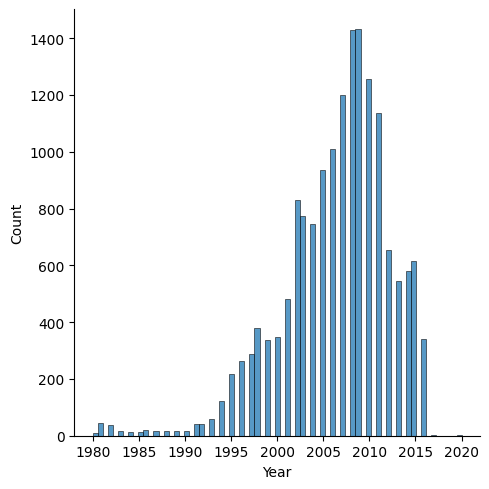

In [12]:
sns.displot(games.Year)

На каких платформах произошло больше всего релизов?
Оставим названия только тех платформ, частота встречаемости которых составляет более 7%.

In [40]:
games.Platform.value_counts(normalize = True).\
    sort_values(ascending = False).reset_index().query("proportion > 0.07")

,Platform,proportion
0,DS,0.130808
1,PS2,0.130563
2,PS3,0.080044
3,Wii,0.079185
4,X360,0.075747
5,PSP,0.073476
6,PS,0.072985


In [41]:
games.Platform.value_counts(normalize = True).\
    sort_values(ascending = False).reset_index().query("proportion > 0.07").Platform.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [48]:
games.Publisher.value_counts().sort_values(ascending = False).reset_index().head(5)

,Publisher,count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823


Сфокусируемся на играх от Nintendo. Посчитаем среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

In [51]:
nintendo_games = games.query("Publisher == 'Nintendo'")
nintendo_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [54]:
nintendo_games.NA_Sales.mean()

1.1720545977011492

In [ ]:
nintendo_games.NA_Sales.median()

In [55]:
nintendo_games.NA_Sales.std()

2.9899128164968642

In [73]:
games.query("Publisher == 'Nintendo'").groupby('Publisher', as_index = False)\
    .agg({'NA_Sales': 'mean', 'EU_Sales' : 'mean', 'JP_Sales' : 'mean', 'Other_Sales' : 'mean'})

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,1.172055,0.601006,0.653721,0.136767


In [75]:
games.query("Publisher == 'Nintendo'").groupby('Publisher', as_index = False)\
    .agg({'NA_Sales': 'median', 'EU_Sales' : 'median', 'JP_Sales' : 'median', 'Other_Sales' : 'median'})

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,0.375,0.12,0.28,0.03


In [76]:
games.query("Publisher == 'Nintendo'").groupby('Publisher', as_index = False)\
    .agg({'NA_Sales': 'std', 'EU_Sales' : 'std', 'JP_Sales' : 'std', 'Other_Sales' : 'std'})

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Nintendo,2.989913,1.743953,1.06311,0.46417


Теперь посмотрим на продажи Nintendo в Японии по жанрам. Построим боксплот, где:

* по оси x будет расположен жанр игры (Genre)
* по оси у – объем продаж в Японии (JP_sales)

<Axes: xlabel='Genre', ylabel='JP_Sales'>

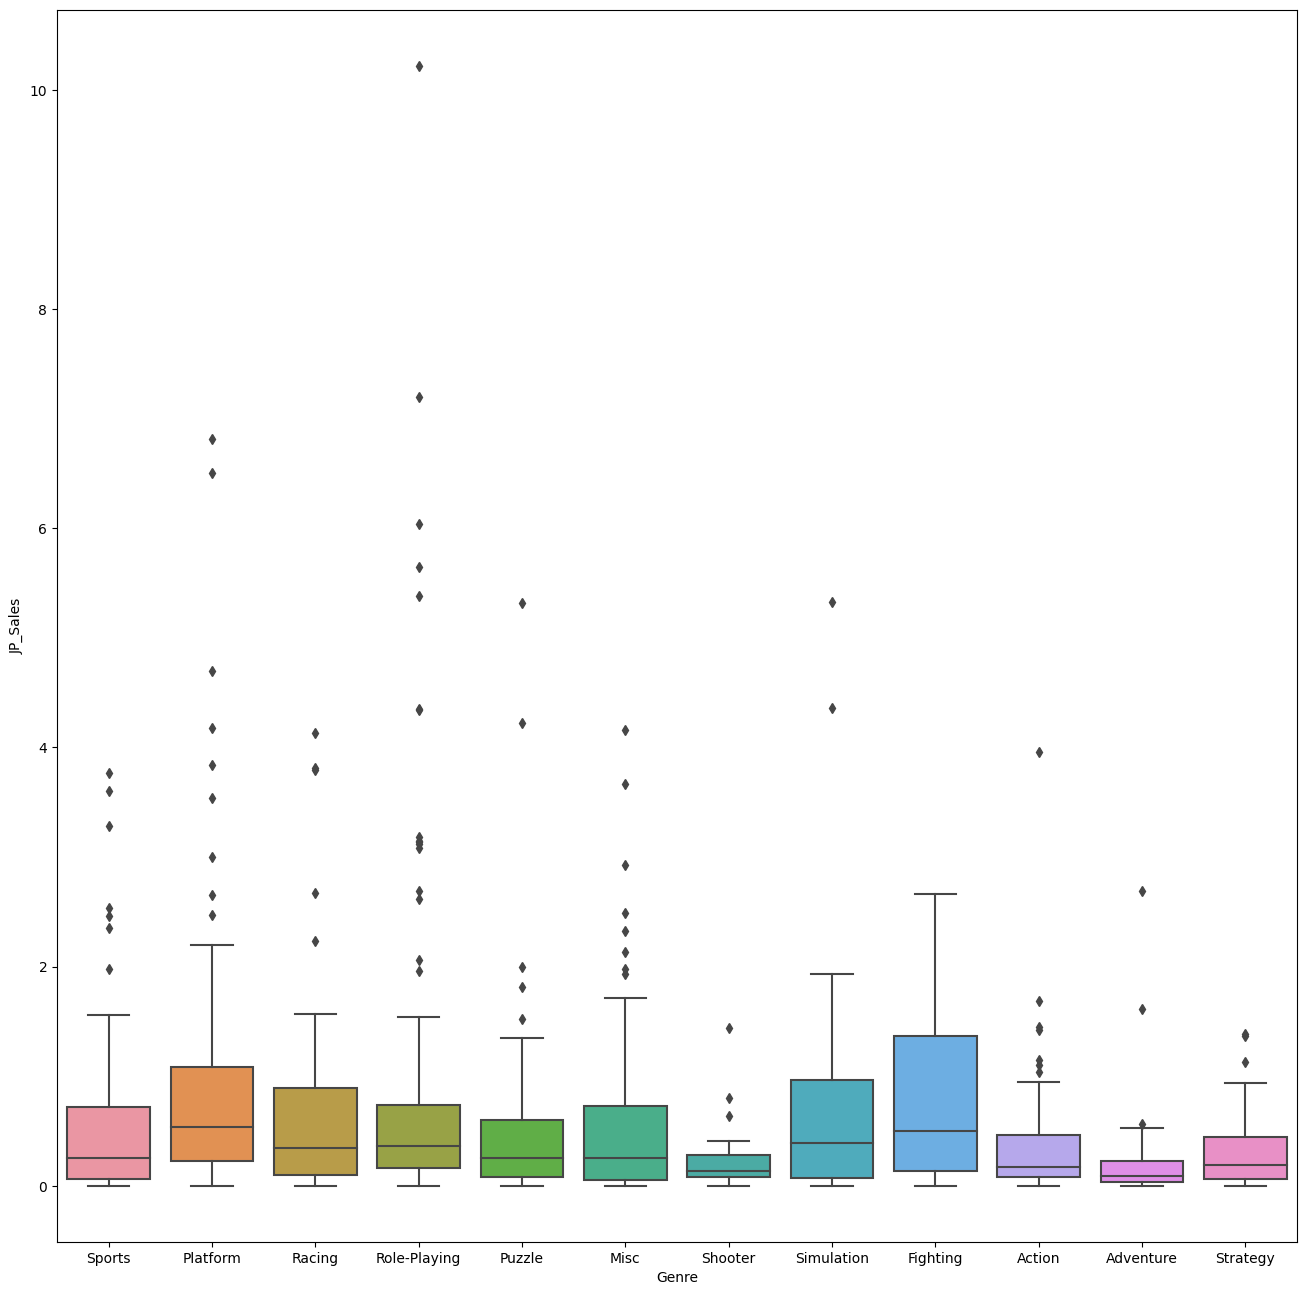

In [80]:
plt.figure(figsize=(16,16))
sns.boxplot(data = nintendo_games, x = 'Genre', y = 'JP_Sales')

* **Межквартильный размах у Strategy меньше, чем у Puzzle**
* **Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation**
* **Наибольший межквартильный размах наблюдается у игр жанра Fighting**

Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

<Axes: xlabel='Year', ylabel='Global_Sales'>

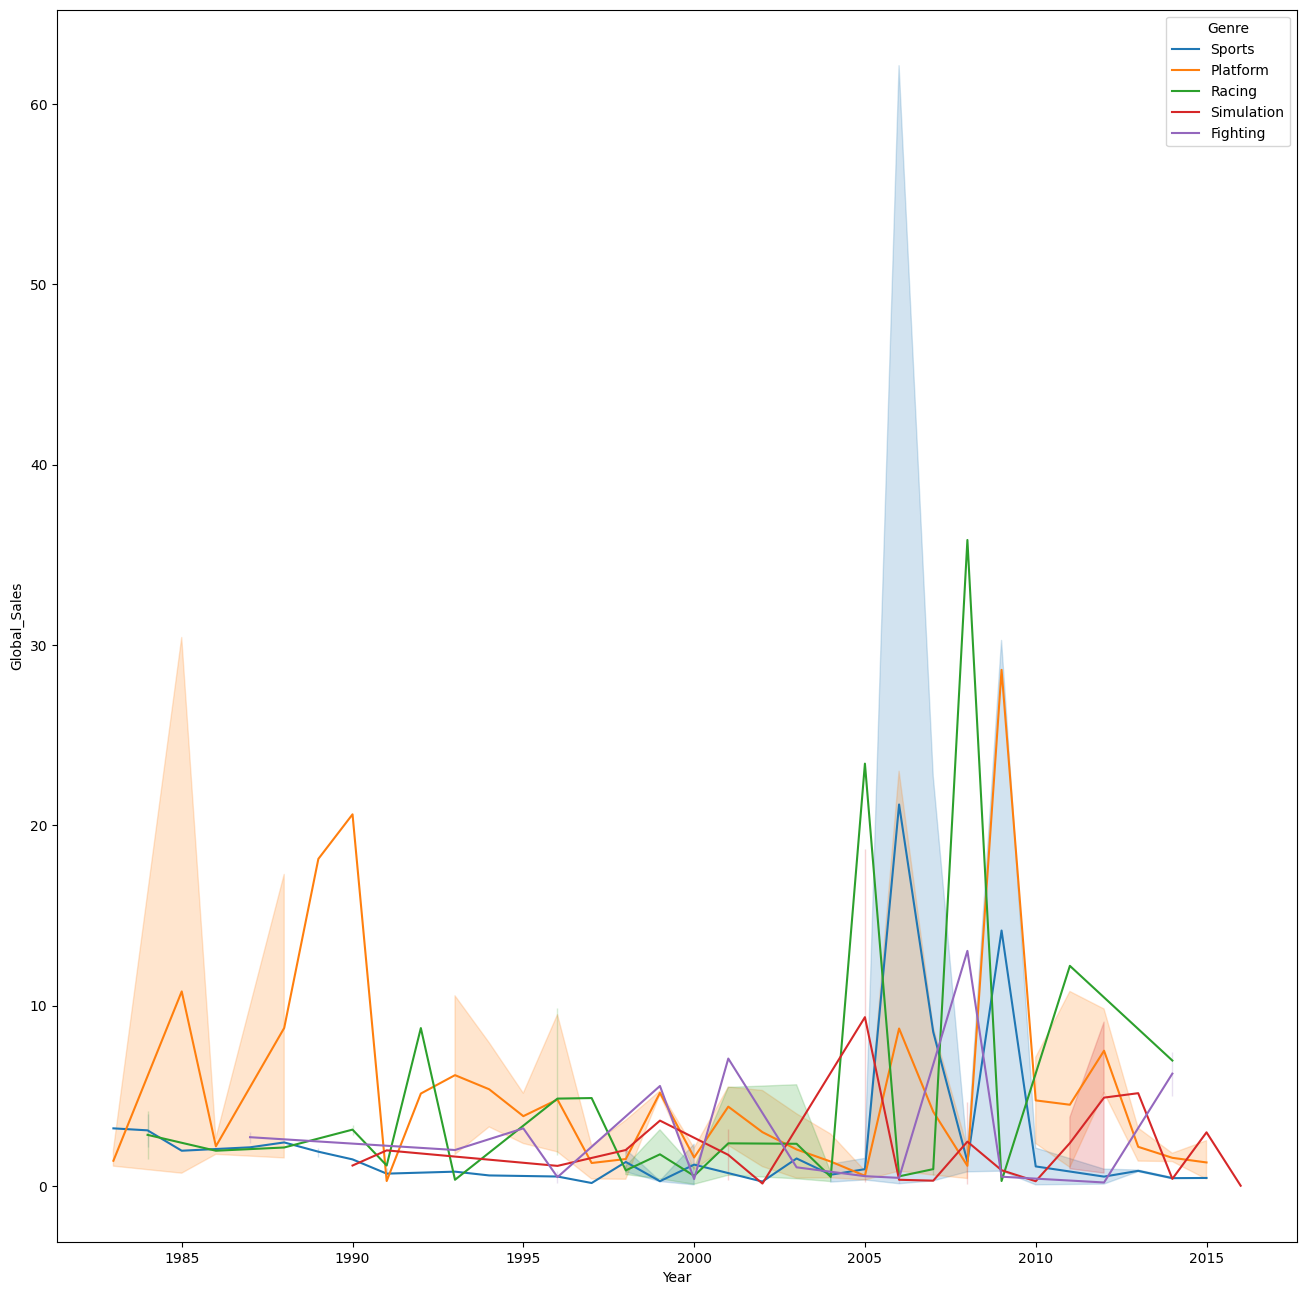

In [105]:
plt.figure(figsize=(16,16))
sns.lineplot(data = nintendo_games[nintendo_games['Genre'].\
                    isin(('Fighting', 'Simulation', 'Platform', 'Racing', 'Sports'))], \
                     x = 'Year', y = 'Global_Sales', hue = 'Genre')

Видим, что в 2005 – 2010 годах у жанра спорт самые высокие 